# Question 1 

In [1]:
# Below are the code obtained from UW-Madison CS 532 Activity 13 Buck_start.ipynb
# Cat image is from https://www.clipart.email/clipart/black-and-white-barn-cat-clipart-358140.html
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import random
import statistics

# Load data for activity
A = mpimg.imread('./cat.png')




In [2]:
## NOISE FUNCTION
def noise(image,probability,rgb):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - probability
    if(rgb == True):
        for i in range(image.shape[0]): # Each Pixel X
            for j in range(image.shape[1]): # Each Pixel Y
                for k in range(image.shape[2]): #Each of the 3 color values (R,G,B)
                    rdn = random.random() 
                    if rdn < probability:
                        output[i][j][k] = 0.0 # Empty, no color on that value, if rgb for this pixel is 0,0,0 color is White
                    elif rdn > thres:
                        output[i][j][k] = 1.0 # Highest value a color value can take, if rgb for this pixel are all 1, color is Black
                    else:
                        output[i][j][k] = image[i][j][k] # copy original's pixel r,g,b if probability not met
    else:
        for i in range(image.shape[0]): # Each Pixel X
            for j in range(image.shape[1]): # Each Pixel Y
                rdn = random.random() 
                if rdn < probability:
                    output[i][j] = 0.0 # Empty, no color on that value, if rgb for this pixel is 0,0,0 color is White
                elif rdn > thres:
                    output[i][j] = 1.0 # Highest value a color value can take, if rgb for this pixel are all 1, color is Black
                else:
                    output[i][j] = image[i][j] # copy original's pixel if probability not met
    return output




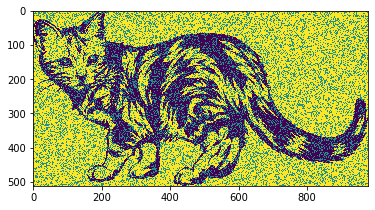

In [3]:
## Noisy Image
imageN = A+noise(A,0.30,False)
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.imshow(imageN)
plt.show()

In [4]:
# The following code are twisted from https://github.com/wjlei1990/EarlyWarning/blob/master/ml/regressor.py
from sklearn import linear_model

# TO DO: Complete the code below
alphas = [0.1, 1, 2, 3, 5, 10, 15, 20]

reg = linear_model.RidgeCV(alphas=alphas, store_cv_values=True)
reg.fit(imageN, A)

# generate the prediction using the best model
alpha = reg.alpha_
reg = linear_model.Ridge(alpha=alpha)
reg.fit(imageN, A)

predict_y = reg.predict(imageN)



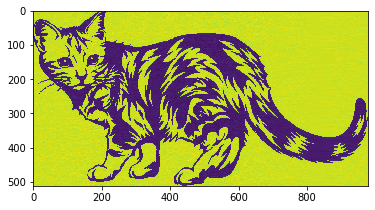

In [5]:
#Plot figure after generalized cross validation
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.imshow(predict_y)
plt.show()



# Question 3

In [6]:
## INITIAL SETUP Test stuff from one of our activities
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg
import random
import statistics

# Load data for activity
#
image = mpimg.imread('./randall.png') ## Image Array is MxNx3
print(image.shape)

(399, 600, 3)


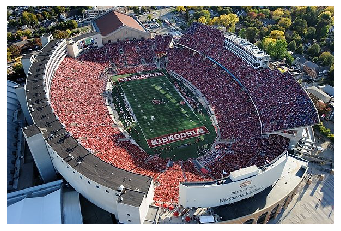

In [7]:
# Display Original
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(image)
ax.set_axis_off()
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


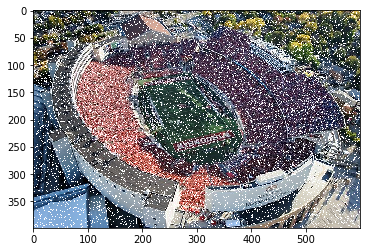

In [8]:
## Noisy Image
imageN = image+noise(image,0.10,False)
fig1 = plt.figure()

ax1 = fig1.add_subplot(111)
ax1.imshow(imageN)
plt.show()

In [9]:
## Median Filter section
def med_filter(image,ksize):
    output = np.zeros(image.shape)
    for i in range(image.shape[0]): # Each Pixel X
        for j in range(image.shape[1]): # Each Pixel Y
            valList = []
            #print(i,"i")
            #print(j,"j")
            for x in range((i-ksize),(i+ksize),1): # Neighborhood iteration
                for y in range((j-ksize),(j+ksize),1):
                    #print(x," is x")
                    #print(y," is y")
                    if(x < image.shape[0]-1 and x>=0):
                        if(y < image.shape[1]-1 and y>=0):
                            valList.append(image[x][y])
                            #print("valid median point")
            if valList:
                    ##value = *******
                    output[i][j] = value
            else:
                    output[i][j] = image[i][j]
        
    return output


imageD =med_filter(imageN,3) ## Actual function call to run median filter

NameError: name 'value' is not defined

In [ ]:
fig2 = plt.figure()

ax2 = fig2.add_subplot(111)
ax2.imshow(imageD)
plt.show()